# PyCaret Tutorial

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Reading the Data

In [2]:
housing_data = pd.read_csv('./data/housing.csv')
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Initializing the Experiment

In [4]:
from pycaret.regression import *
import time

reg_experiment = setup(housing_data, 
                       target = 'median_house_value', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_housing')

,Description,Value
0,session_id,123
1,Target,median_house_value
2,Original Data,"(20640, 10)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14447, 13)"


## Comparing Baseline Models

In [5]:
best_model = compare_models(exclude=['xgboost'], fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,31000.5953,2200017181.9057,46885.7986,0.8349,0.2311,0.1723,3.5140
lightgbm,Light Gradient Boosting Machine,32451.3493,2362163127.6538,48582.4247,0.8228,0.2381,0.1807,0.0600
rf,Random Forest Regressor,33072.4135,2566864379.1811,50654.4931,0.8074,0.2443,0.1841,1.3920
et,Extra Trees Regressor,35715.2657,2858839641.0988,53460.6235,0.7855,0.2549,0.1982,0.7140
gbr,Gradient Boosting Regressor,39002.0759,3147927887.3150,56090.0139,0.7639,0.2736,0.2185,0.4580
lr,Linear Regression,50194.2094,4765782937.6000,69026.2594,0.6426,0.3911,0.2888,0.5980
lasso,Lasso Regression,50194.6047,4765787648.0000,69026.2969,0.6426,0.3906,0.2888,0.3480
ridge,Ridge Regression,50196.5250,4766065254.4000,69028.3469,0.6426,0.3905,0.2888,0.3180
lar,Least Angle Regression,50194.1769,4765780154.8404,69026.2405,0.6426,0.3907,0.2888,0.0140
llar,Lasso Least Angle Regression,50179.0742,4766693246.6140,69032.5865,0.6425,0.3801,0.2881,0.0140


## Creating the Model

In [6]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29879.4353,1932405073.6177,43959.1296,0.8661,0.2151,0.1624
1,30345.5989,1999661259.9516,44717.5722,0.8514,0.2162,0.1624
2,31201.0130,2262051471.8058,47561.0289,0.8303,0.2275,0.1691
3,30900.7440,2348479575.7192,48461.1141,0.8339,0.2280,0.1662
4,29473.5750,1902271614.7240,43615.0389,0.8629,0.2145,0.1631
5,31846.3307,2258649894.6077,47525.2553,0.8134,0.2424,0.1834
6,30960.0968,2145856068.7498,46323.3858,0.8368,0.2375,0.1799
7,30581.9802,2119416670.4346,46037.1227,0.8399,0.2353,0.1750
8,31535.4497,2338779487.4424,48360.9293,0.8188,0.2373,0.1759
9,30843.4771,2261619659.2282,47556.4891,0.8238,0.2353,0.1724


## Hyperparameter Tuning

In [7]:
tuned_catboost = tune_model(catboost, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,34759.8884,2526315303.7806,50262.4642,0.8249,0.2448,0.1945
1,34898.4934,2478220516.2968,49781.7287,0.8159,0.2351,0.1869
2,35667.7944,2723984088.9998,52191.8010,0.7956,0.2543,0.1991
3,35838.9140,2922060014.8211,54056.0821,0.7933,0.2534,0.1967
4,34605.6574,2546234694.9729,50460.2288,0.8165,0.2479,0.1954
5,35851.5624,2653478000.3731,51511.9210,0.7808,0.2583,0.2049
6,35693.9117,2699004334.3083,51951.9425,0.7948,0.2620,0.2084
7,35078.1211,2635640166.6925,51338.4862,0.8009,0.2582,0.2021
8,35637.1912,2897167407.8340,53825.3417,0.7755,0.2594,0.1978
9,35017.4483,2697616091.7411,51938.5800,0.7898,0.2571,0.1984


## Visualizing the Model's Performance

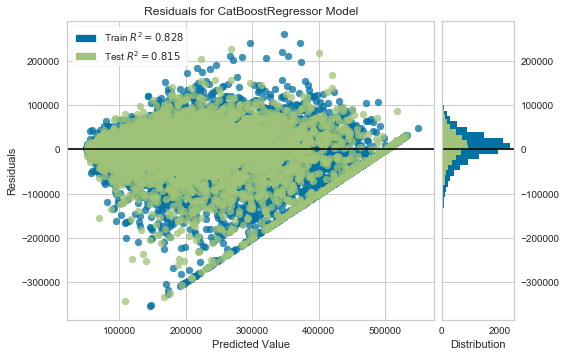

In [8]:
plot_model(tuned_catboost)

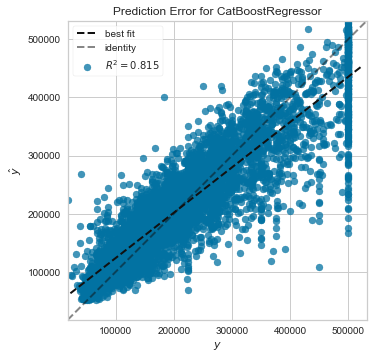

In [9]:
plot_model(tuned_catboost, plot = 'error')

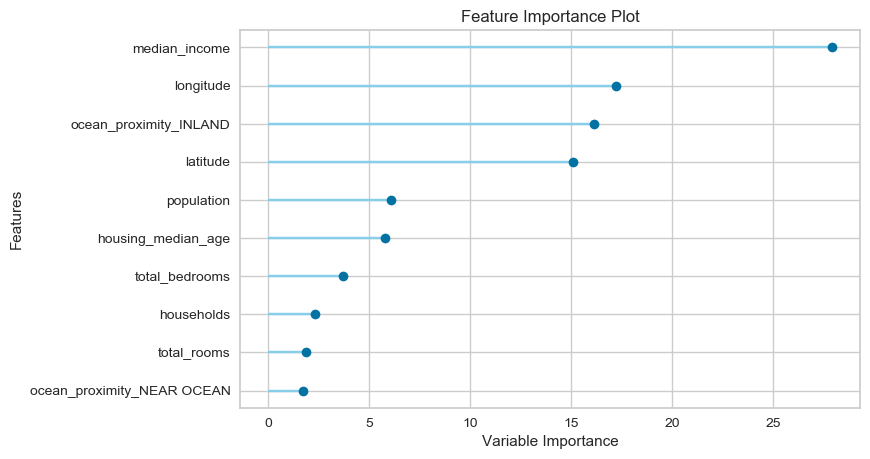

In [10]:
plot_model(tuned_catboost, plot = 'feature')

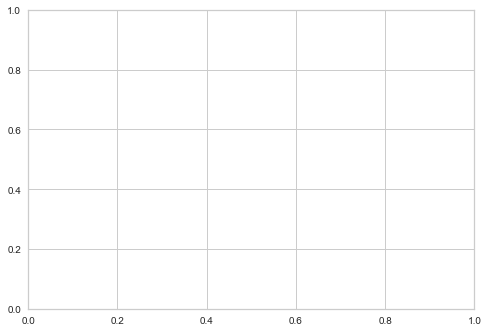

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
evaluate_model(tuned_catboost)

## Interpreting the Model

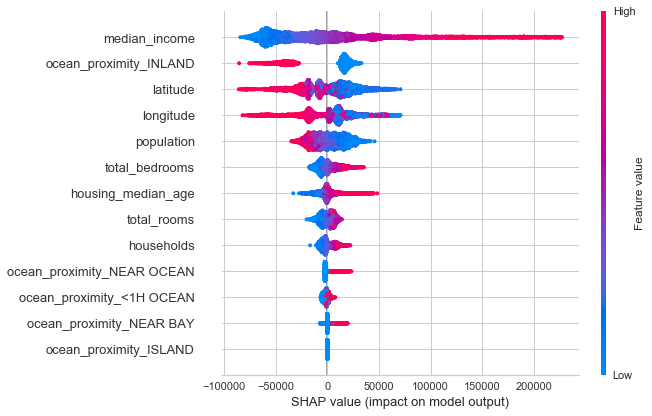

In [12]:
interpret_model(tuned_catboost)

## AutoML

In [13]:
automl_model = automl(optimize = 'MAE')
automl_model

## Generating Predictions

In [14]:
pred_holdouts = predict_model(automl_model)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,29557.2726,1959196967.3202,44262.8170,0.8518,0.2249,0.1678


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,Label
0,-122.639999,38.240002,40.0,1974.0,410.0,1039.0,398.0,3.7917,1.0,0.0,0.0,0.0,0.0,151600.0,204245.853674
1,-119.050003,36.090000,9.0,3297.0,568.0,1749.0,568.0,4.0217,0.0,1.0,0.0,0.0,0.0,99200.0,98050.988356
2,-116.980003,32.849998,12.0,3570.0,713.0,3321.0,666.0,4.0882,1.0,0.0,0.0,0.0,0.0,134500.0,145348.324627
3,-118.419998,34.200001,27.0,3201.0,970.0,3403.0,948.0,2.2377,1.0,0.0,0.0,0.0,0.0,231700.0,177355.589219
4,-118.470001,34.009998,41.0,2704.0,557.0,1047.0,478.0,4.4211,1.0,0.0,0.0,0.0,0.0,462900.0,422591.317506


In [15]:
new_data = housing_data.copy()
new_data.drop(['median_house_value'], axis=1, inplace=True)
predictions = predict_model(automl_model, data=new_data)
predictions.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,Label
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,413088.196896
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,430391.699993
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,398224.537603
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,338421.618174
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,290095.235317


## Saving the Model

In [16]:
save_model(automl_model, model_name='automl-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='median_house_value',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='median_house_value')),
                 ('fix_perfect', Remove_100(target='median_house_value')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_se

In [17]:
loaded_model = load_model('automl-model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='median_house_value',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='median_house_value')),
                ('fix_perfect', Remove_100(target='median_house_value')),
                ('clean_names', Clean_Colum_Na

## Model Deployment

In [18]:
deploy_model(automl_model, model_name = 'automl-model-aws', 
             platform='aws',
             authentication = {'bucket' : 'pycaret-ca-housing-model'})

Model Succesfully Deployed on AWS S3


## MLFlow UI

In [19]:
!mlflow ui

[2021-02-23 16:25:46 -0600] [34533] [INFO] Starting gunicorn 20.0.4
[2021-02-23 16:25:46 -0600] [34533] [INFO] Listening at: http://127.0.0.1:5000 (34533)
[2021-02-23 16:25:46 -0600] [34533] [INFO] Using worker: sync
[2021-02-23 16:25:46 -0600] [34536] [INFO] Booting worker with pid: 34536
^C
[2021-02-23 16:27:25 -0600] [34533] [INFO] Handling signal: int
[2021-02-23 16:27:25 -0600] [34536] [INFO] Worker exiting (pid: 34536)
